# Generate comparison Plots (*preview*)
This third **pipeline** shows how to take the dataframes obtained from *Filter1*, or any sucesive *Filter* **pipeline** and create a plot showing multiple trends in a selected time.

## 1. Obtaining a *.csv* from the raw source (for every source where needed)
This was done manually for the *.xlsx* files. The selected Spreadsheets were selected and saved as *.csv*. Original files are stored in the **raw_data** directory and resulting on the **source_data** directory. (csv UTF-8 format was selected).

## 1. Generic plot for first (ref) indicator
First a simple plot needs to be generated to check that the source file is compatible and provide a **reference** plot for more uqantities to be introduced


### 1.1 Import required packages

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Set particular values

In [117]:
source_name = 'Finances\project_financing_world.csv'
# Select Column as Index
index = ['Recipient Country/Area']
# Assign selected indexes
sel_index = ['USA', 'India', 'Germany',"China"]
# Select years
years=['Year']
# Select other Columns as ID's
other_ids = ['Amount (USD million)']

### 2.3 Apply all the changes to obtain the desired resumed long dataframe

In [118]:
df = pd.read_csv('source_data\\' + source_name)

df_p = df[index+years+other_ids]

#df_p=pd.melt(df_p, id_vars=index+other_ids)

df_p=df_p.set_index(index)

df_p = df_p.loc[sel_index]

*Here we return to the numerical index*

In [119]:
df_p = df_p.reset_index()

*Here more readablle names for the columns afre defined*

In [120]:
df_p=df_p.rename(columns={'Amount (USD million)':'value'})

In [121]:
df_p=df_p.rename(columns={'Recipient Country/Area':'country'})

In [122]:
df_p.head()

,country,Year,value
0,USA,2011,101.9630
1,USA,2013,35.0284
2,USA,2010,54.0404
3,USA,2012,7.5230
4,USA,2012,13.5959


### 2.4 Do further necessary adjustments

In [123]:
#get numeric
df_p.value=pd.to_numeric(df_p.value)
#Instedad of 'to_numeric()', 'astype()' or '.apply()' could have been used

In [124]:
# Group by 
df_p=df_p.groupby(['country','Year']).sum()

In [125]:
df_p=df_p.reset_index()

## 3. Plot the desired indicators
Here we supposed that **df_p** is handed in in *long format*

In [ ]:
#not needed

### 3.1 Create a DF_Subset to plot
Here an internal understanding of the source data is required to know which Raws to select, according to the desired *id's*

**First we identify which columns (ids) are there to select from**
For all cases 'year' and 'value' needs to be available for pllotting afterwards

In [126]:
df_p.columns

Index(['country', 'Year', 'value'], dtype='object')

In this case we can further select from 'Product' and 'Flow'. In the most simple case, no extra coumns will be available (e.g. **other_ids = []**)

**Now we look into the unique options in the available extra ids to select our interest**

In [127]:
df_p.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [128]:
df_p.country.unique()

array(['China', 'Germany', 'India', 'USA'], dtype=object)

**A selection is possible from the give options of each id**
Note that not *all* the options of one id correspond with all the options of the other one

In [129]:
# Here a Loop may be applicable, defining the following characteristics as lists instead 
# of strings and then enabling multiple plot generation
select_country='Germany'
select_id = ['USD million']
select_option = ['Project Capital Flow']

In [130]:
df_graph = df_p[df_p.country==select_country]

In [131]:
#for i in range(0,len(select_id)-1):
#    df_graph=df_graph[df_graph[select_id[i]]==select_option[i]]  
df_graph.head()

,country,Year,value
18,Germany,2009,138.6513
19,Germany,2010,358.0958
20,Germany,2011,693.1666
21,Germany,2012,587.1718
22,Germany,2013,529.6564


### 3.2 Set other characteristics of the plot

In [10]:
# Here some features of the seaborn package or an eventual coupling 
# with R to use the GGPlot library is to be introduced

### 3.3 Create the Plot

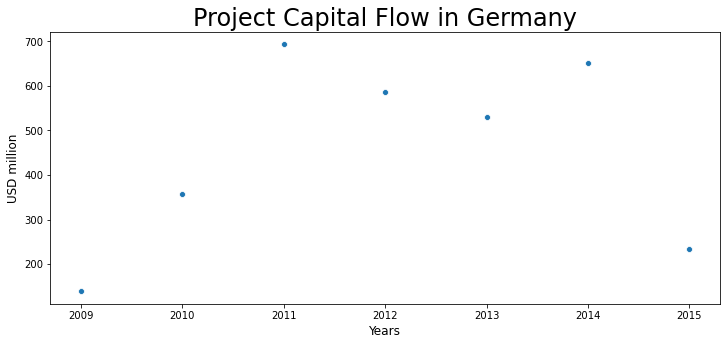

<Figure size 432x288 with 0 Axes>

In [135]:
# Set figure size (width, height) in inches 
fig, ax = plt.subplots(figsize = ( 12 , 5 )) 
  
# Plot the scatterplot 
sns.scatterplot( ax = ax , x='Year', y='value', data=df_graph) 
  
# Set label for x-axis 
ax.set_xlabel( 'Years' , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( select_id[len(select_id)-1] , size = 12 ) 
  
# Set title for plot 
ax.set_title( select_option[0]+' in '+select_country , size = 24 ) 
  
# Display figure 
plt.show() 

# Save the figure
plt.savefig(select_option[0]+'_'+select_country+'.png')